In [1]:
import pickle
import pytorch_lightning as pl
import numpy as np
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import torch
from neuralpredictors.data.samplers import SubsetSequentialSampler
from typing import Optional
import pathlib
from torch.utils.data import Dataset
from torchvision import transforms
import matplotlib.pyplot as plt
import math
from experiments.utils import pickle_read
from skimage.transform import resize

def pickle_save(path, x):
    with open(path, "wb") as f:
        pickle.dump(x, f)


# Compute mean!!!

In [2]:
path_old = "/storage/brno2/home/mpicek/reCNN_visual_prosthesis/data/antolik"
path_new = "/storage/brno2/home/mpicek/reCNN_visual_prosthesis/data/antolik_reparametrized"


In [3]:
stim_p = path_new + "/stimuli.pickle"
stim = pickle_read(stim_p)

In [4]:
ex_p = path_new + "/V1_Exc_L23/resp.pickle"
inh_p = path_new + "/V1_Inh_L23/resp.pickle"
ex = pickle_read(ex_p)
inh = pickle_read(inh_p)


In [5]:
stim[0].shape

(220, 220)

In [6]:
ex.shape

(45000, 4000)

In [7]:
inh.shape

(45000, 1000)

In [8]:
dic = {}

In [9]:
index = 0
for experiment in range(len(stim)):
    dic[index] = {}
    index += 1

In [10]:
len(dic)


45000

In [11]:
downsampled_list = []
for experiment in range(len(stim)):
    downsampled = resize(stim[experiment], (stim[experiment].shape[0] // 2, stim[experiment].shape[1] // 2), anti_aliasing=True)
    downsampled_list.append(downsampled)
downsampled_stim_array = np.stack(downsampled_list)

In [12]:
downsampled_stim_array.shape

(45000, 110, 110)

In [13]:
print(np.mean(downsampled_stim_array))
print(np.std(downsampled_stim_array))

46.25135729356395
26.337162920481937


In [14]:
index = 0
for experiment in range(len(stim)):
        downsampled = resize(stim[experiment], (stim[experiment].shape[0] // 2, stim[experiment].shape[1] // 2), anti_aliasing=True)
        dic[index]["stimulus"] = downsampled
        dic[index]['V1_Exc_L2/3'] = ex[experiment, :]
        dic[index]['V1_Inh_L2/3'] = inh[experiment, :]
        index += 1

In [15]:
dic[0]["stimulus"].shape

(110, 110)

In [16]:
dic[0]["V1_Exc_L2/3"].shape

(4000,)

In [17]:
image = dic[0]["stimulus"]

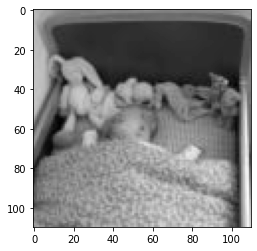

In [20]:
plt.imshow(dic[4]["stimulus"], cmap='gray')

In [19]:
new_one_trials = "/storage/brno2/home/mpicek/reCNN_visual_prosthesis/data/antolik_reparametrized/one_trials.pickle"

In [21]:
pickle_save(new_one_trials, dic)

In [18]:
# old = pickle_read(path_old + "/ten_trials.pickle")

In [19]:
# indices = [list(old.keys())[i] for i in range(len(old))]

In [ ]:
# np.sum(old[indices[10]]["stimulus"] - old[indices[19]]["stimulus"])

In [3]:
x = pickle_read("/storage/brno2/home/mpicek/reCNN_visual_prosthesis/data/antolik_reparametrized/one_trials.pickle")

In [ ]:
for i in range(len(x.keys())):
    s = x[i]['stimulus']
    assert s.shape == (110, 110)
    